My personal toolbox to analize players in the Fantasy Premier League game. <br>
Code below contains scraper as well as examples of usage.

In [1]:
# Importing libaries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Scraping from the Fantasy Premier League API
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()

elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [2]:
# Sampling out important columns for analysis
slim_elements_df = elements_df[['web_name','team','element_type','now_cost','selected_by_percent',
                                           'transfers_in','transfers_out','form','total_points','bonus',
                                           'points_per_game','value_season','minutes','goals_scored','assists',
                                           'clean_sheets','saves', 'ict_index']]

In [3]:
# Data cleaning
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)
slim_elements_df['form'] = slim_elements_df.form.astype(float)
slim_elements_df['selected_by_percent'] = slim_elements_df.selected_by_percent.astype(float)
slim_elements_df['ict_index'] = slim_elements_df.ict_index.astype(float)
slim_elements_df['now_cost'] = slim_elements_df['now_cost'] / 10
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]
del slim_elements_df['value_season']
del slim_elements_df['element_type']
data = slim_elements_df

Examples of usage:

In [4]:
# Sorting the data by total number of points
data.sort_values('ict_index', ascending=False)

,web_name,team,now_cost,selected_by_percent,transfers_in,transfers_out,form,total_points,bonus,points_per_game,minutes,goals_scored,assists,clean_sheets,saves,ict_index,position,value
373,Salah,Liverpool,13.2,61.9,5832748,5060780,7.0,212,25,8.5,2161,19,11,13,0,342.7,Midfielder,16.1
439,Fernandes,Man Utd,11.6,16.1,2400047,5124939,5.8,129,15,4.8,2307,9,6,7,0,246.7,Midfielder,11.1
370,Mané,Liverpool,11.7,3.7,776861,847354,7.4,134,6,5.6,2046,12,4,12,0,237.9,Midfielder,11.5
568,Son,Spurs,10.8,21.4,5061054,5010171,6.2,145,14,6.3,1984,11,7,10,0,222.0,Midfielder,13.4
377,Alexander-Arnold,Liverpool,8.5,46.4,4094726,2855662,6.0,174,31,7.2,2133,2,11,14,0,221.6,Defender,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Costa,Leeds,5.4,0.0,1668,15029,0.0,1,0,1.0,21,0,0,0,0,0.0,Midfielder,0.2
324,McAteer,Leicester,4.5,0.0,227,194,0.0,1,0,1.0,2,0,0,0,0,0.0,Midfielder,0.2
288,Tosun,Everton,5.0,0.1,126490,121521,0.0,1,0,1.0,5,0,0,0,0,0.0,Forward,0.2
280,Kean,Everton,6.0,0.0,2460,3291,0.0,1,0,1.0,1,0,0,0,0,0.0,Forward,0.2


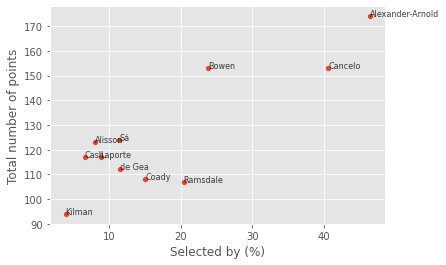

In [6]:
# Sampling and visualizing players with value (points/price) above 20:
value_over_20 = data.loc[data['value']>20]
sns.scatterplot(x='selected_by_percent', y='total_points', data=value_over_20)
xs = value_over_20['selected_by_percent']
ys= value_over_20['total_points']
list_of_texts = value_over_20['web_name']
for x, y, text in zip(xs, ys, list_of_texts):
    plt.annotate(text, (x, y), fontsize=8, alpha=0.75)
plt.xlabel('Selected by (%)')
plt.ylabel('Total number of points')
plt.show()

In [7]:
# Sampling out players with ITC index over 200
data.loc[data['ict_index'] >200].sort_values('ict_index', ascending=False)

,web_name,team,now_cost,selected_by_percent,transfers_in,transfers_out,form,total_points,bonus,points_per_game,minutes,goals_scored,assists,clean_sheets,saves,ict_index,position,value
373,Salah,Liverpool,13.2,61.9,5832748,5060780,7.0,212,25,8.5,2161,19,11,13,0,342.7,Midfielder,16.1
439,Fernandes,Man Utd,11.6,16.1,2400047,5124939,5.8,129,15,4.8,2307,9,6,7,0,246.7,Midfielder,11.1
370,Mané,Liverpool,11.7,3.7,776861,847354,7.4,134,6,5.6,2046,12,4,12,0,237.9,Midfielder,11.5
568,Son,Spurs,10.8,21.4,5061054,5010171,6.2,145,14,6.3,1984,11,7,10,0,222.0,Midfielder,13.4
377,Alexander-Arnold,Liverpool,8.5,46.4,4094726,2855662,6.0,174,31,7.2,2133,2,11,14,0,221.6,Defender,20.5
658,Bowen,West Ham,6.9,23.8,3896318,1897963,4.5,153,16,5.5,2361,8,13,7,0,219.4,Midfielder,22.2
411,Bernardo,Man City,7.2,17.2,4076246,2794025,4.0,128,14,4.7,2317,7,6,14,0,213.9,Midfielder,17.8
566,Kane,Spurs,12.3,17.4,3048041,2654880,7.2,109,14,4.4,2151,10,3,8,0,213.0,Forward,8.9
651,Antonio,West Ham,7.5,30.9,7270999,6892863,2.5,112,13,4.1,2380,8,8,7,0,208.6,Forward,14.9
19,Saka,Arsenal,6.6,24.6,3662232,2692829,6.5,122,11,4.9,1910,8,6,11,0,204.5,Midfielder,18.5


In [8]:
# Sampling out one particular player
data.loc[data['web_name'] == 'Mbeumo']

,web_name,team,now_cost,selected_by_percent,transfers_in,transfers_out,form,total_points,bonus,points_per_game,minutes,goals_scored,assists,clean_sheets,saves,ict_index,position,value
102,Mbeumo,Brentford,5.2,1.0,660304,673339,1.6,75,3,3.0,2049,3,3,5,0,120.5,Midfielder,14.4


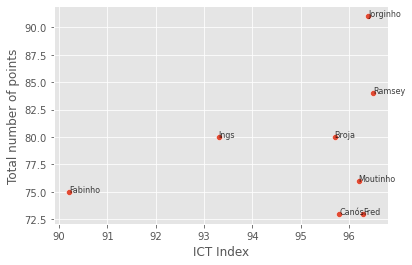

In [10]:
# Making a scatterplot with all players with low ITC scores and high total number of points (overperforming players)
viz = data.loc[data['ict_index'] < 100].loc[data['total_points'] > 70].loc[data['position'].isin(['Midfielder','Forward'])].sort_values('total_points', ascending=False).head(10)
sns.scatterplot(x='ict_index', y='total_points', data=viz)
xs = viz['ict_index']
ys= viz['total_points']
list_of_texts = viz['web_name']
for x, y, text in zip(xs, ys, list_of_texts):
    plt.annotate(text, (x, y), fontsize=8, alpha=0.75)
plt.xlabel('ICT Index')
plt.ylabel('Total number of points')
plt.show()